Load the dataset and do a quick sanity check on its shape and columns.

In [69]:
import pandas as pd

DATA_PATH = "../Data/Huntington_Disease_Dataset.csv"

df = pd.read_csv(DATA_PATH)

print(df.shape)
df.head()

(48536, 21)


,Patient_ID,Age,Sex,Family_History,HTT_CAG_Repeat_Length,Motor_Symptoms,Cognitive_Decline,Chorea_Score,Brain_Volume_Loss,Functional_Capacity,...,HTT_Gene_Expression_Level,Protein_Aggregation_Level,Random_Protein_Sequence,Random_Gene_Sequence,Disease_Stage,Gene/Factor,Chromosome_Location,Function,Effect,Category
0,b2a49170-8561-4665-9371-2240b55dd87a,31,Male,No,67,Moderate,Severe,8.80,3.20,94,...,1.67,0.58,DAHKIRSPMRVGPHYYAQCDNNDTGSDKEHWLKTEAAPMTMDRTVE...,GCCAGCAGCGCCCGAGCGTATGAGGTATATGGATTGGACATTGGGC...,Middle,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
1,f5fae45d-8718-41c4-a957-6928f79f3c8e,33,Female,Yes,38,Severe,Moderate,3.24,5.98,50,...,0.18,0.30,PANGFWYHNCLRFWNIPPYVMEGFPLADITEVHKWRVSGFMCWETQ...,AGTTTTCAGTGAGACTCTTCCCCAAAAGCCTCCACTACGACAGTGT...,Pre-Symptomatic,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
2,66ab0567-050b-4d56-9ec4-b676309899a6,69,Male,Yes,37,Severe,Moderate,1.01,2.82,69,...,0.90,1.04,NWHEGHGASTWKATMVAWCLMVQHAVTWKEGNTRCREMSCMNFTQL...,TATACCACCAGTGGGAAGAGTAACGATTTTGGAGCGCCCCGAGTCC...,Early,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
3,996a48e4-e841-418f-a539-5a7a86cd815d,66,Male,Yes,50,Mild,Severe,3.21,6.77,76,...,1.16,1.87,KCVQYIQATQMLVQSWGQRNPIMQSSEPDRAHDYESGTPKTYTYML...,GCGCGACCGACCAAAGGACCCATGGTGGTGATCTGTCATTGGATTC...,Pre-Symptomatic,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier
4,d45c7ca8-7125-4aaa-8018-5bbc60d35a1f,43,Female,Yes,48,Moderate,Mild,2.31,7.53,70,...,1.85,2.94,DQPGNMTRQNKNHCMWRAKRPTKHPGHKPGEIDKEKSEQNDADSSA...,GGGACCGCGGTTCTAGAAGAGAGGTTCTCTGACCGCCGAAGGATTC...,Late,HTT (Somatic Expansion),4p16.3,CAG Repeat Instability,Faster Disease Onset,Cis-acting Modifier


In [70]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

from src.data_cleaning import (
    select_columns,
    strip_spaces_columns,
    normalize_case_columns,
    gene_filter,
    convert_numeric_columns,
    drop_missing_required,
)

columns_list = ["Patient_ID", "Gene/Factor", "Disease_Stage", "Brain_Volume_Loss", "Age", "Sex"]

sub_df = select_columns(df, columns_list)
sub_df = strip_spaces_columns(sub_df, columns=["Gene/Factor", "Disease_Stage", "Sex"])
sub_df = gene_filter(sub_df, "Gene/Factor", values_list=["MLH1", "MSH3", "HTT (Somatic Expansion)"])
sub_df = normalize_case_columns(sub_df, columns=["Gene/Factor", "Disease_Stage", "Sex"])
sub_df = convert_numeric_columns(sub_df, columns=["Brain_Volume_Loss", "Age"])
sub_df = drop_missing_required(sub_df, columns_list)

print(sub_df.shape)
sub_df.head()


(36307, 6)


,Patient_ID,Gene/Factor,Disease_Stage,Brain_Volume_Loss,Age,Sex
2,66ab0567-050b-4d56-9ec4-b676309899a6,msh3,early,2.82,69,male
3,996a48e4-e841-418f-a539-5a7a86cd815d,msh3,pre-symptomatic,6.77,66,male
4,d45c7ca8-7125-4aaa-8018-5bbc60d35a1f,htt (somatic expansion),late,7.53,43,female
5,38cea144-1280-42cb-9362-dbf0f4aafe3b,msh3,middle,3.34,58,female
6,10760159-d219-4a4f-b374-f25ebeb1f9a6,mlh1,middle,2.50,80,female


basic EDA quality checks on sub_df
Here we check: (1) a quick overview, (2) missing values per column, and (3) full-row duplicates.

In [71]:
from src.eda import basic_overview, missingness_table, duplicates_info

overview = basic_overview(sub_df)
print("Rows:", overview["n_rows"])
print("Cols:", overview["n_cols"])
print("\nDtypes:")
display(overview["dtypes"])

print("\nMissingness:")
display(missingness_table(sub_df))

print("\nDuplicates:")
print(duplicates_info(sub_df))


Rows: 36307
Cols: 6

Dtypes:


Patient_ID                   object
Gene/Factor          string[python]
Disease_Stage        string[python]
Brain_Volume_Loss           float64
Age                           int64
Sex                  string[python]
dtype: object


Missingness:


,missing_count,missing_pct
column,,
Patient_ID,0,0.0
Gene/Factor,0,0.0
Disease_Stage,0,0.0
Brain_Volume_Loss,0,0.0
Age,0,0.0
Sex,0,0.0



Duplicates:
{'n_duplicate_rows': 0.0, 'duplicate_pct': 0.0}


Descriptive summaries
Now we summarize the distribution of numeric variables (Age, Brain_Volume_Loss) and the frequency of categorical variables (Gene/Factor, Disease_Stage, Sex).

In [72]:
from src.eda import numeric_summary, categorical_summary

print("Numeric summary:")
display(numeric_summary(sub_df))

print("\nCategorical summary:")
cat = categorical_summary(sub_df, cols=["Gene/Factor", "Disease_Stage", "Sex"])
for col, table in cat.items():
    print(f"\n{col}")
    display(table)


Numeric summary:


,count,mean,std,min,25%,50%,75%,max
column,,,,,,,,
Brain_Volume_Loss,36307.0,5.260934,1.872521,2.0,3.64,5.28,6.88,8.5
Age,36307.0,55.065222,14.785485,30.0,42.00,55.00,68.00,80.0



Categorical summary:

Gene/Factor


,count,pct
Gene/Factor,,
mlh1,12223,33.665684
msh3,12056,33.205718
htt (somatic expansion),12028,33.128598



Disease_Stage


,count,pct
Disease_Stage,,
middle,9179,25.281626
pre-symptomatic,9171,25.259592
late,8984,24.74454
early,8973,24.714242



Sex


,count,pct
Sex,,
male,18156,50.006886
female,18151,49.993114


Group summaries for the research question
We summarize Brain_Volume_Loss across Disease_Stage (main factor), and then we check how Age and Sex are distributed across stages (because we will adjust for them later).

In [73]:
from src.eda import group_descriptives, crosstab_counts

print("Brain_Volume_Loss by Disease_Stage:")
display(group_descriptives(sub_df, group_col="Disease_Stage", value_col="Brain_Volume_Loss"))

print("\nAge by Disease_Stage:")
display(group_descriptives(sub_df, group_col="Disease_Stage", value_col="Age"))

print("\nSex by Disease_Stage (counts):")
display(crosstab_counts(sub_df, row_col="Disease_Stage", col_col="Sex"))


Brain_Volume_Loss by Disease_Stage:


,n,mean,median,iqr
Disease_Stage,,,,
early,8973,5.254907,5.25,3.220
late,8984,5.288536,5.30,3.220
middle,9179,5.251896,5.26,3.265
pre-symptomatic,9171,5.248839,5.29,3.230



Age by Disease_Stage:


,n,mean,median,iqr
Disease_Stage,,,,
early,8973,55.273264,56.0,25.0
late,8984,55.037734,55.0,26.0
middle,9179,55.124523,55.0,26.0
pre-symptomatic,9171,54.829244,55.0,26.0



Sex by Disease_Stage (counts):


Sex,female,male
Disease_Stage,,
early,4524,4449
late,4476,4508
middle,4543,4636
pre-symptomatic,4608,4563


Final sanity checks before moving to modeling
We confirm that the dataset contains only the expected Gene/Factor values and that the key analysis columns exist.

In [74]:
from src.eda import assert_required_columns, assert_allowed_values

assert_required_columns(
    sub_df,
    ["Patient_ID", "Gene/Factor", "Disease_Stage", "Brain_Volume_Loss", "Age", "Sex"]
)

assert_allowed_values(
    sub_df,
    col="Gene/Factor",
    allowed_values=["mlh1", "msh3", "htt (somatic expansion)"]
)

assert_allowed_values(
    sub_df,
    col="Sex",
    allowed_values=["male", "female"]
)

assert_allowed_values(
    sub_df,
    col="Disease_Stage",
    allowed_values=["early", "middle", "late", "pre-symptomatic"]
)

print("Sanity checks passed.")


Sanity checks passed.


Boxplot of Brain Volume Loss across Disease Stages
This plot helps visualize differences in the distribution of Brain_Volume_Loss between disease stages (median, spread, and potential outliers).

<Figure size 640x480 with 0 Axes>

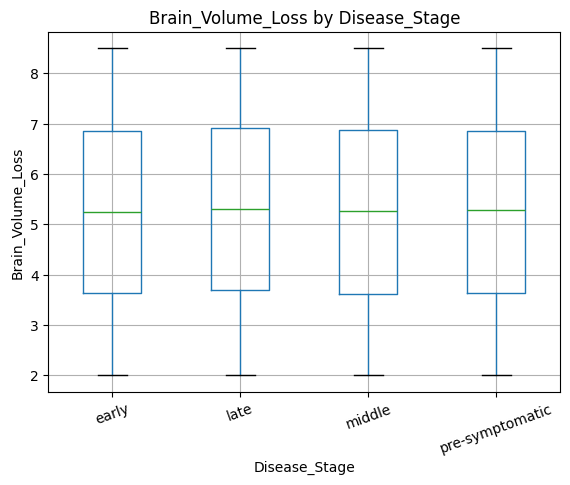

In [75]:
import matplotlib.pyplot as plt

plt.figure()
sub_df.boxplot(column="Brain_Volume_Loss", by="Disease_Stage")
plt.title("Brain_Volume_Loss by Disease_Stage")
plt.suptitle("")  # removes the automatic pandas subtitle
plt.xlabel("Disease_Stage")
plt.ylabel("Brain_Volume_Loss")
plt.xticks(rotation=20)
plt.show()


Histogram of Brain Volume Loss
This plot shows the overall distribution of Brain_Volume_Loss to check skewness and potential outliers.

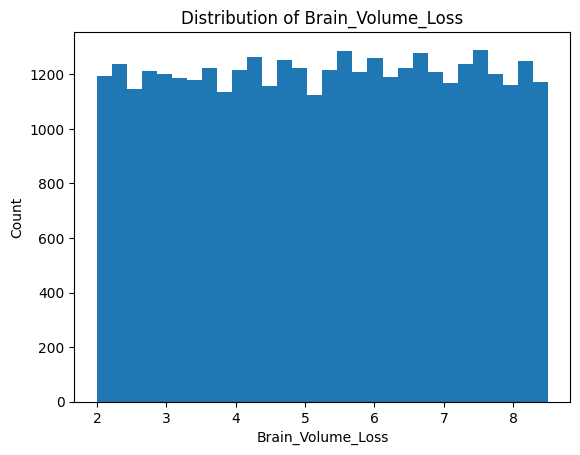

In [76]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(sub_df["Brain_Volume_Loss"], bins=30)
plt.title("Distribution of Brain_Volume_Loss")
plt.xlabel("Brain_Volume_Loss")
plt.ylabel("Count")
plt.show()


Scatter plot (Age vs Brain Volume Loss) with transparency
This scatter plot visualizes the relationship between Age and Brain_Volume_Loss.
Because the dataset is large, many points overlap; therefore, we use transparency (alpha) to reduce overplotting and make the density of points easier to interpret.

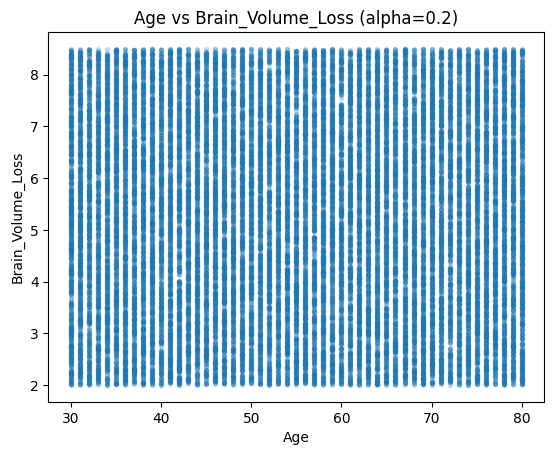

In [77]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(sub_df["Age"], sub_df["Brain_Volume_Loss"], s=8, alpha=0.2)
plt.title("Age vs Brain_Volume_Loss (alpha=0.2)")
plt.xlabel("Age")
plt.ylabel("Brain_Volume_Loss")
plt.show()


Boxplot of Brain Volume Loss by Sex
This plot compares the distribution of Brain_Volume_Loss between sexes (median and spread), which supports the “adjust for Sex” part of the research question.

<Figure size 640x480 with 0 Axes>

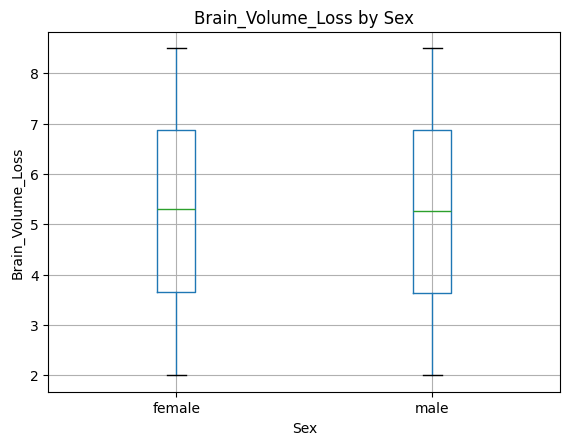

In [78]:
import matplotlib.pyplot as plt

plt.figure()
sub_df.boxplot(column="Brain_Volume_Loss", by="Sex")
plt.title("Brain_Volume_Loss by Sex")
plt.suptitle("")
plt.xlabel("Sex")
plt.ylabel("Brain_Volume_Loss")
plt.show()
